## A quick look at the major economic indicators of a few countries  

We start by importing the relevant libraries and the [gdp-per-capita dataset from Kaggle](https://www.kaggle.com/datasets/shaswatatripathy/gdp-per-capita-gov-expenditure-trade/data).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualizations
plt.style.use('fast')
sns.set_palette('husl')

# Read the dataset
dfgdp = pd.read_csv('gdp_per_capita.csv')
dfgdp = dfgdp.drop(columns=["Code"]) # useless column
summary = pd.DataFrame({
    'Column Type': dfgdp.dtypes,
    'Missing Values': dfgdp.isnull().sum(),
    'Total': dfgdp.count(),
    'Uniques': dfgdp.nunique(),
    'min': dfgdp.min(numeric_only=True),
    'mean': dfgdp.mean(numeric_only=True),
    'median': dfgdp.median(numeric_only=True),
    'max': dfgdp.max(numeric_only=True)
}).reset_index().rename(columns={'index': 'Column'})

# Display basic information
print("Dataset Info:")
print("-" * 100)
display(summary)

print("\nFirst few rows:")
print("-" * 100)
display(dfgdp.head())

Dataset Info:
----------------------------------------------------------------------------------------------------


,Column,Column Type,Missing Values,Total,Uniques,min,mean,median,max
0,Entity,object,0,147615,173,NaN,NaN,NaN,NaN
1,GDP per capita,float64,0,147615,9710,403.601900,8770.541322,3204.651900,160051.23000
2,Government expenditure (% of GDP),float64,139202,8413,8318,0.684444,23.679777,20.274118,594.76980
3,"Inflation, consumer prices (annual %)",float64,3884,143731,7859,-17.640425,7.225029,4.652298,23773.13000
4,Trade as a Share of GDP,float64,3886,143729,8231,0.000000,51.509635,48.775925,442.62003
5,Value of global merchandise exports as a share...,float64,15019,132596,10007,0.044430,19.745334,17.700430,302.30634
6,Year,int64,0,147615,223,1800.000000,1995.451099,2000.000000,2022.00000



First few rows:
----------------------------------------------------------------------------------------------------


,Entity,Year,GDP per capita,Value of global merchandise exports as a share of GDP,Government expenditure (% of GDP),Trade as a Share of GDP,"Inflation, consumer prices (annual %)"
0,Afghanistan,2005,964.4081,6.11945,NaN,NaN,12.686269
1,Afghanistan,2006,1057.0966,5.89436,NaN,NaN,6.784596
2,Afghanistan,2007,1259.9967,4.61202,NaN,NaN,8.680571
3,Afghanistan,2008,1319.6074,5.11368,NaN,NaN,26.418665
4,Afghanistan,2009,1557.3207,3.93394,NaN,NaN,-6.811161


We'll start with Iran, including some of its major historical events. Note that these events are not an exhaustive list of influential events. Naother notheworthy point is the fact that most of this data comes from government-affilited sources, which means it could be altered considering the authoritarian behaviour of the Islamic Republic.

In [2]:
# Filter data for Iran
iran_data = dfgdp[dfgdp['Entity'] == 'Iran']

# Create a dictionary of events
iran_events = {
    'Year': [
        1963, 1978, 1979, 1980, 1988, 1989, 1995, 2002, 2003, 2005, 2009, 2010, 
        2012, 2013, 2015, 2018, 2019, 2020
    ],
    'Event': [
        'Shah launches "White Revolution" modernization program',
        'Mass demonstrations against Shah, martial law imposed',
        'Islamic Revolution - Shah forced into exile, Islamic Republic established',
        'Iran-Iraq war starts',
        'Iran-Iraq war ends with ceasefire',
        'Khomeini dies, Khamenei becomes supreme leader',
        'US imposes oil and trade sanctions',
        'Bush says Iran in "Axis of Evil"',
        'Iran suspends uranium enrichment program',
        'Mahmoud Ahmadinejad becomes president',
        'Green Movement protests',
        'UN imposes new sanctions over nuclear program',
        'EU oil embargo, Iranian currency (rial) falls 80%',
        'Hassan Rouhani wins presidential election',
        'Nuclear deal reached with world powers',
        'US withdraws from nuclear deal',
        '"Bloody Aban" mass protests',
        'US kills Qasem (Kotlet) Soleimani'
    ]
}

# Create DataFrame
events_df = pd.DataFrame(iran_events)

# Display the events
print("Major Events in Iran's Recent History:")
display(events_df)

event_categories = [
    'Social',         # 1963
    'Political',      # 1978
    'Political',      # 1979 Revolution
    'Military',       # 1980 War
    'Military',       # 1988
    'Political',      # 1989
    'Economic',       # 1995
    'Diplomatic',     # 2002
    'Diplomatic',     # 2003
    'Political',      # 2005
    'Political',      # 2009
    'Economic',       # 2010
    'Economic',       # 2012
    'Political',      # 2013
    'Diplomatic',     # 2015
    'Diplomatic',     # 2018
    'Economic',       # 2019
    'Military'        # 2020
]

color_dict = {
    'Political': '#E74C3C',    # Red
    'Economic': '#2ECC71',     # Green
    'Military': '#8E44AD',     # Purple
    'Diplomatic': '#3498DB',   # Blue
    'Social': '#F39C12',       # Orange
}

# Create the color list based on categories
event_colors = [color_dict[cat] for cat in event_categories]

# Add these as new columns to the events_df
events_df['Category'] = event_categories
events_df['Color'] = event_colors


Major Events in Iran's Recent History:


,Year,Event
0,1963,"Shah launches ""White Revolution"" modernization..."
1,1978,"Mass demonstrations against Shah, martial law ..."
2,1979,"Islamic Revolution - Shah forced into exile, I..."
3,1980,Iran-Iraq war starts
4,1988,Iran-Iraq war ends with ceasefire
5,1989,"Khomeini dies, Khamenei becomes supreme leader"
6,1995,US imposes oil and trade sanctions
7,2002,"Bush says Iran in ""Axis of Evil"""
8,2003,Iran suspends uranium enrichment program
9,2005,Mahmoud Ahmadinejad becomes president


First draft of a plot with events

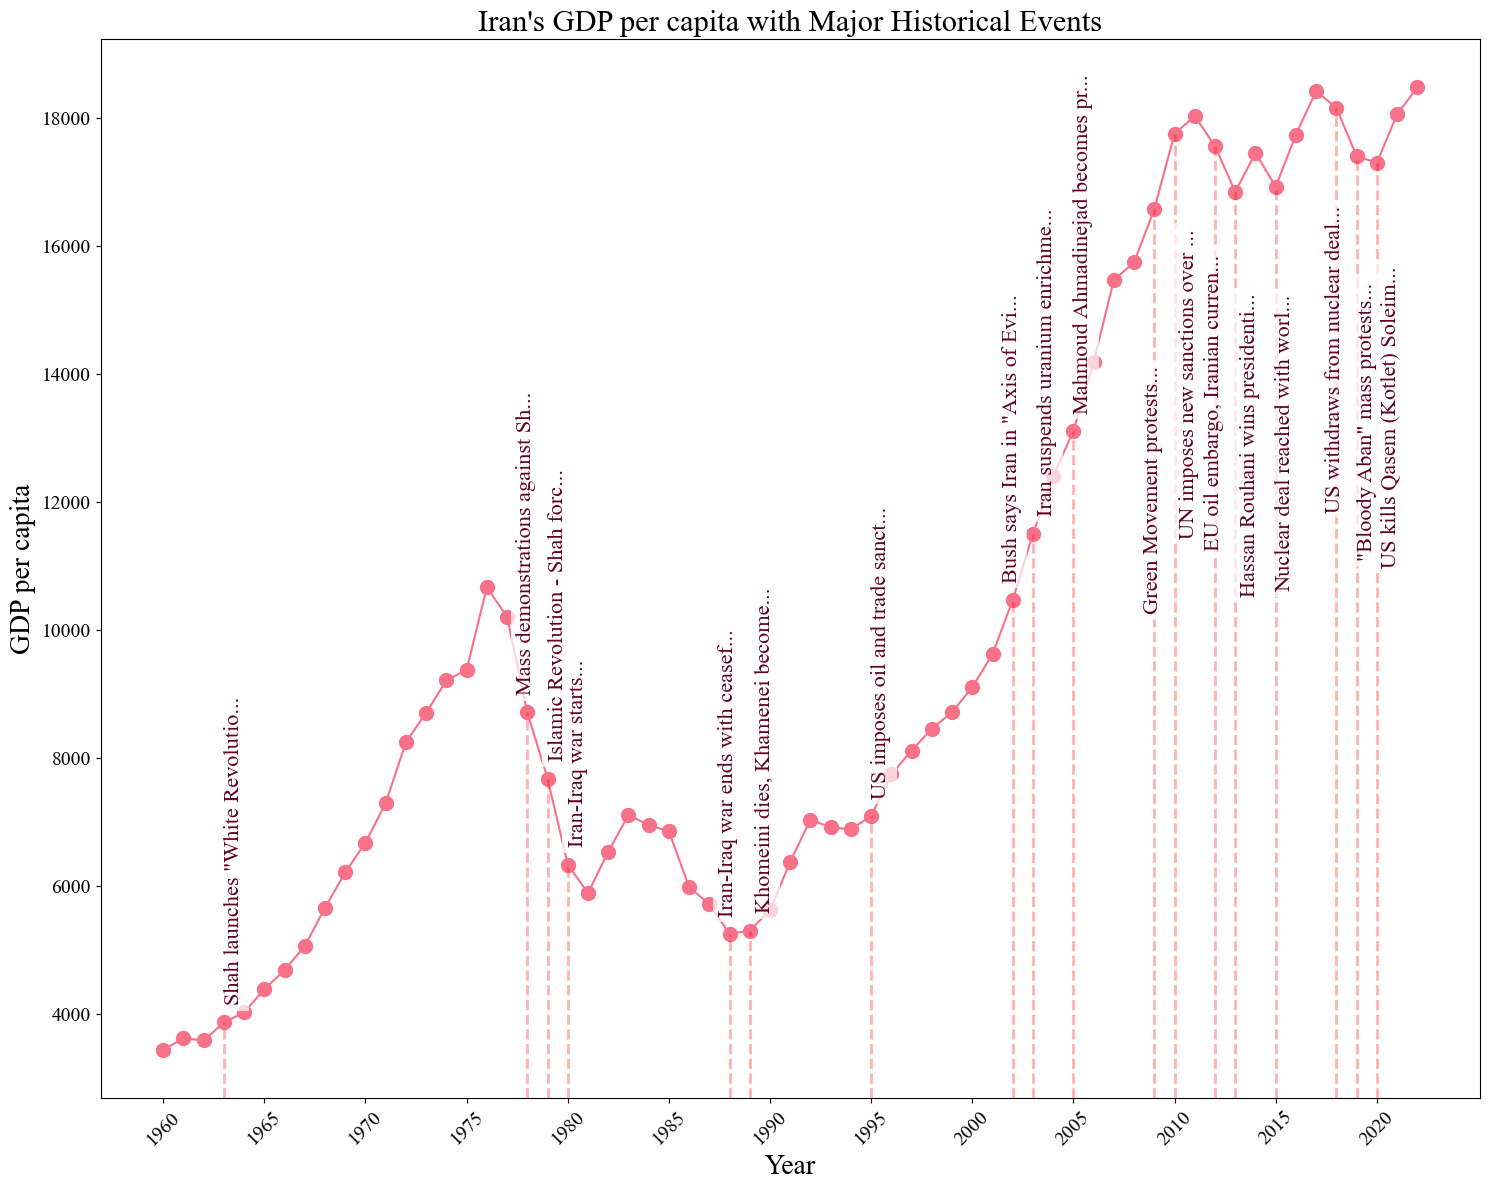

In [3]:
# Now let's create a visualization that combines economic indicators with major events
plt.figure(figsize=(15, 12))
plt.rcParams["font.family"] = "Times New Roman"

# Plot GDP per capita
iran_data = dfgdp[dfgdp['Entity'] == 'Iran']
plt.plot(iran_data['Year'], iran_data['GDP per capita'], label='GDP per capita', marker='o', markersize=10)
axes = plt.gca()
# Add vertical lines for major events
for year in events_df['Year']:
    if year in iran_data['Year'].values:
        plt.axvline(x=year, color='r', alpha=0.3, linestyle='--', linewidth=2, 
                    ymax=(iran_data[iran_data['Year'] == year]['GDP per capita'].iloc[0] - axes.get_ylim()[0])/(axes.get_ylim()[1] - axes.get_ylim()[0]))

xoffsets = [
    0,         # 1963
    -0.5,      # 1978
    0,      # 1979 Revolution
    0,       # 1980 War
    -0.5,       # 1988
    0.2,      # 1989
    0,       # 1995
    -0.5,     # 2002
    0.2,     # 2003
    0,      # 2005
    -0.5,      # 2009
    0.2,       # 2010
    -0.5,       # 2012
    0.2,      # 2013
    0,     # 2015
    -0.5,     # 2018
    0,       # 2019
    0.2        # 2020
]

# Add labels for key events
for ind, row in events_df.iterrows():
    if row['Year'] in iran_data['Year'].values:
        plt.annotate(f"{row['Event'][:30]}...", 
                    xy=(row['Year'], iran_data[iran_data['Year'] == row['Year']]['GDP per capita'].iloc[0]),
                    xytext=(xoffsets[ind], 1 if row['Year'] <= 2005 else -18), textcoords='offset fontsize',
                    rotation=90,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7),
                    ha='left',
                    fontsize=16,
                    color = '#610023')

plt.title("Iran's GDP per capita with Major Historical Events", fontsize=22)
plt.xlabel('Year', fontsize=20)
plt.ylabel('GDP per capita', fontsize=20)
plt.xticks(np.arange(iran_data['Year'].min(), 
                     iran_data['Year'].max()+1, 
                     5),  # Show tick every 5 years
           rotation=45, 
           fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Adding other data and making an interactive plot

In [5]:
# Create subplots
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=(
        'GDP per capita', 
        'Government Expenditure', 
        'Trade Share',
        'Inflation Rate'
    ),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# Function to add traces and events to a subplot
def add_interactive_plot(row, col, y_data, y_title):
    # Add main line
    fig.add_trace(
        go.Scatter(
            x=iran_data['Year'],
            y=y_data,
            name=y_title,
            line=dict(color='#2E86C1', width=2.5),
            showlegend=False
        ),
        row=row, col=col
    )
    
    # Add event markers
    for _, event in events_df.iterrows():
        if event['Year'] in iran_data['Year'].values:
            y_value = y_data[iran_data['Year'] == event['Year']].iloc[0]
            
            # Add vertical line for event
            fig.add_trace(
                go.Scatter(
                    x=[event['Year'], event['Year']],
                    y=[y_data.min(), y_data.max()],
                    mode='lines',
                    line=dict(color=event['Color'], width=1, dash='dash'),
                    name=f"{event['Year']}: {event['Event']}",
                    hoverinfo='name',
                    showlegend=False
                ),
                row=row, col=col
            )
            
            # Add hover point for event
            fig.add_trace(
                go.Scatter(
                    x=[event['Year']],
                    y=[y_value],
                    mode='markers',
                    marker=dict(color=event['Color'], size=8),
                    name=f"{event['Year']}: {event['Event']}",
                    text=f"Year: {event['Year']}<br>Event: {event['Event']}<br>Value: {y_value:.2f}<br>Category: {event['Category']}",
                    hoverinfo='text',
                    showlegend=False
                ),
                row=row, col=col
            )

# Add all subplots
add_interactive_plot(1, 1, iran_data['GDP per capita'], 'GDP per capita')
add_interactive_plot(2, 1, iran_data['Government expenditure (% of GDP)'], 'Government Expenditure')
add_interactive_plot(3, 1, iran_data['Trade as a Share of GDP'], 'Trade Share')
add_interactive_plot(4, 1, iran_data['Inflation, consumer prices (annual %)'], 'Inflation Rate')

# Update layout
fig.update_layout(
    title=dict(
        text="Iran's Economic Indicators with Major Historical Events (1960-2020)",
        x=0.5,
        y=0.98,
        xanchor='center',
        yanchor='top',
        font=dict(size=24)
    ),
    height=1000,
    width=1100,
    showlegend=True
)

# Update axes labels and formatting
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    gridcolor='lightgray',
    showgrid=True
)

fig.update_yaxes(
    gridcolor='lightgray',
    showgrid=True
)

# Add category legend
for category, color in color_dict.items():
    fig.add_trace(
        go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(size=10, color=color),
            name=category,
            showlegend=True
        )
    )

# Show the plot
fig.show()

# Display events table for reference
print("\nMajor Events Timeline:")
display(events_df.sort_values('Year'))


Major Events Timeline:


,Year,Event,Category,Color
0,1963,"Shah launches ""White Revolution"" modernization...",Social,#F39C12
1,1978,"Mass demonstrations against Shah, martial law ...",Political,#E74C3C
2,1979,"Islamic Revolution - Shah forced into exile, I...",Political,#E74C3C
3,1980,Iran-Iraq war starts,Military,#8E44AD
4,1988,Iran-Iraq war ends with ceasefire,Military,#8E44AD
5,1989,"Khomeini dies, Khamenei becomes supreme leader",Political,#E74C3C
6,1995,US imposes oil and trade sanctions,Economic,#2ECC71
7,2002,"Bush says Iran in ""Axis of Evil""",Diplomatic,#3498DB
8,2003,Iran suspends uranium enrichment program,Diplomatic,#3498DB
9,2005,Mahmoud Ahmadinejad becomes president,Political,#E74C3C
